<a href="https://colab.research.google.com/github/SalmaMagdy1188/Faculty_Timetable/blob/main/yolo8BigDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi

Sun Oct  1 23:45:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import os
HOME = os.getcwd()
print(HOME)


/content


# Pip install method (recommended)

In [6]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.190 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


test yolo in 1 image

In [8]:
!yolo predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg"

100% 6.23M/6.23M [00:00<00:00, 284MB/s]
Ultralytics YOLOv8.0.190 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 476k/476k [00:00<00:00, 103MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 88.8ms
Speed: 13.1ms preprocess, 88.8ms inference, 302.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


training

In [9]:

#!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=640
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Abnormal_Behavior_in_Hajj_Crowd_v2i_yolov8/data.yaml epochs=30 imgsz=640



100% 21.5M/21.5M [00:02<00:00, 8.90MB/s]
Ultralytics YOLOv8.0.190 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Abnormal_Behavior_in_Hajj_Crowd_v2i_yolov8/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=F

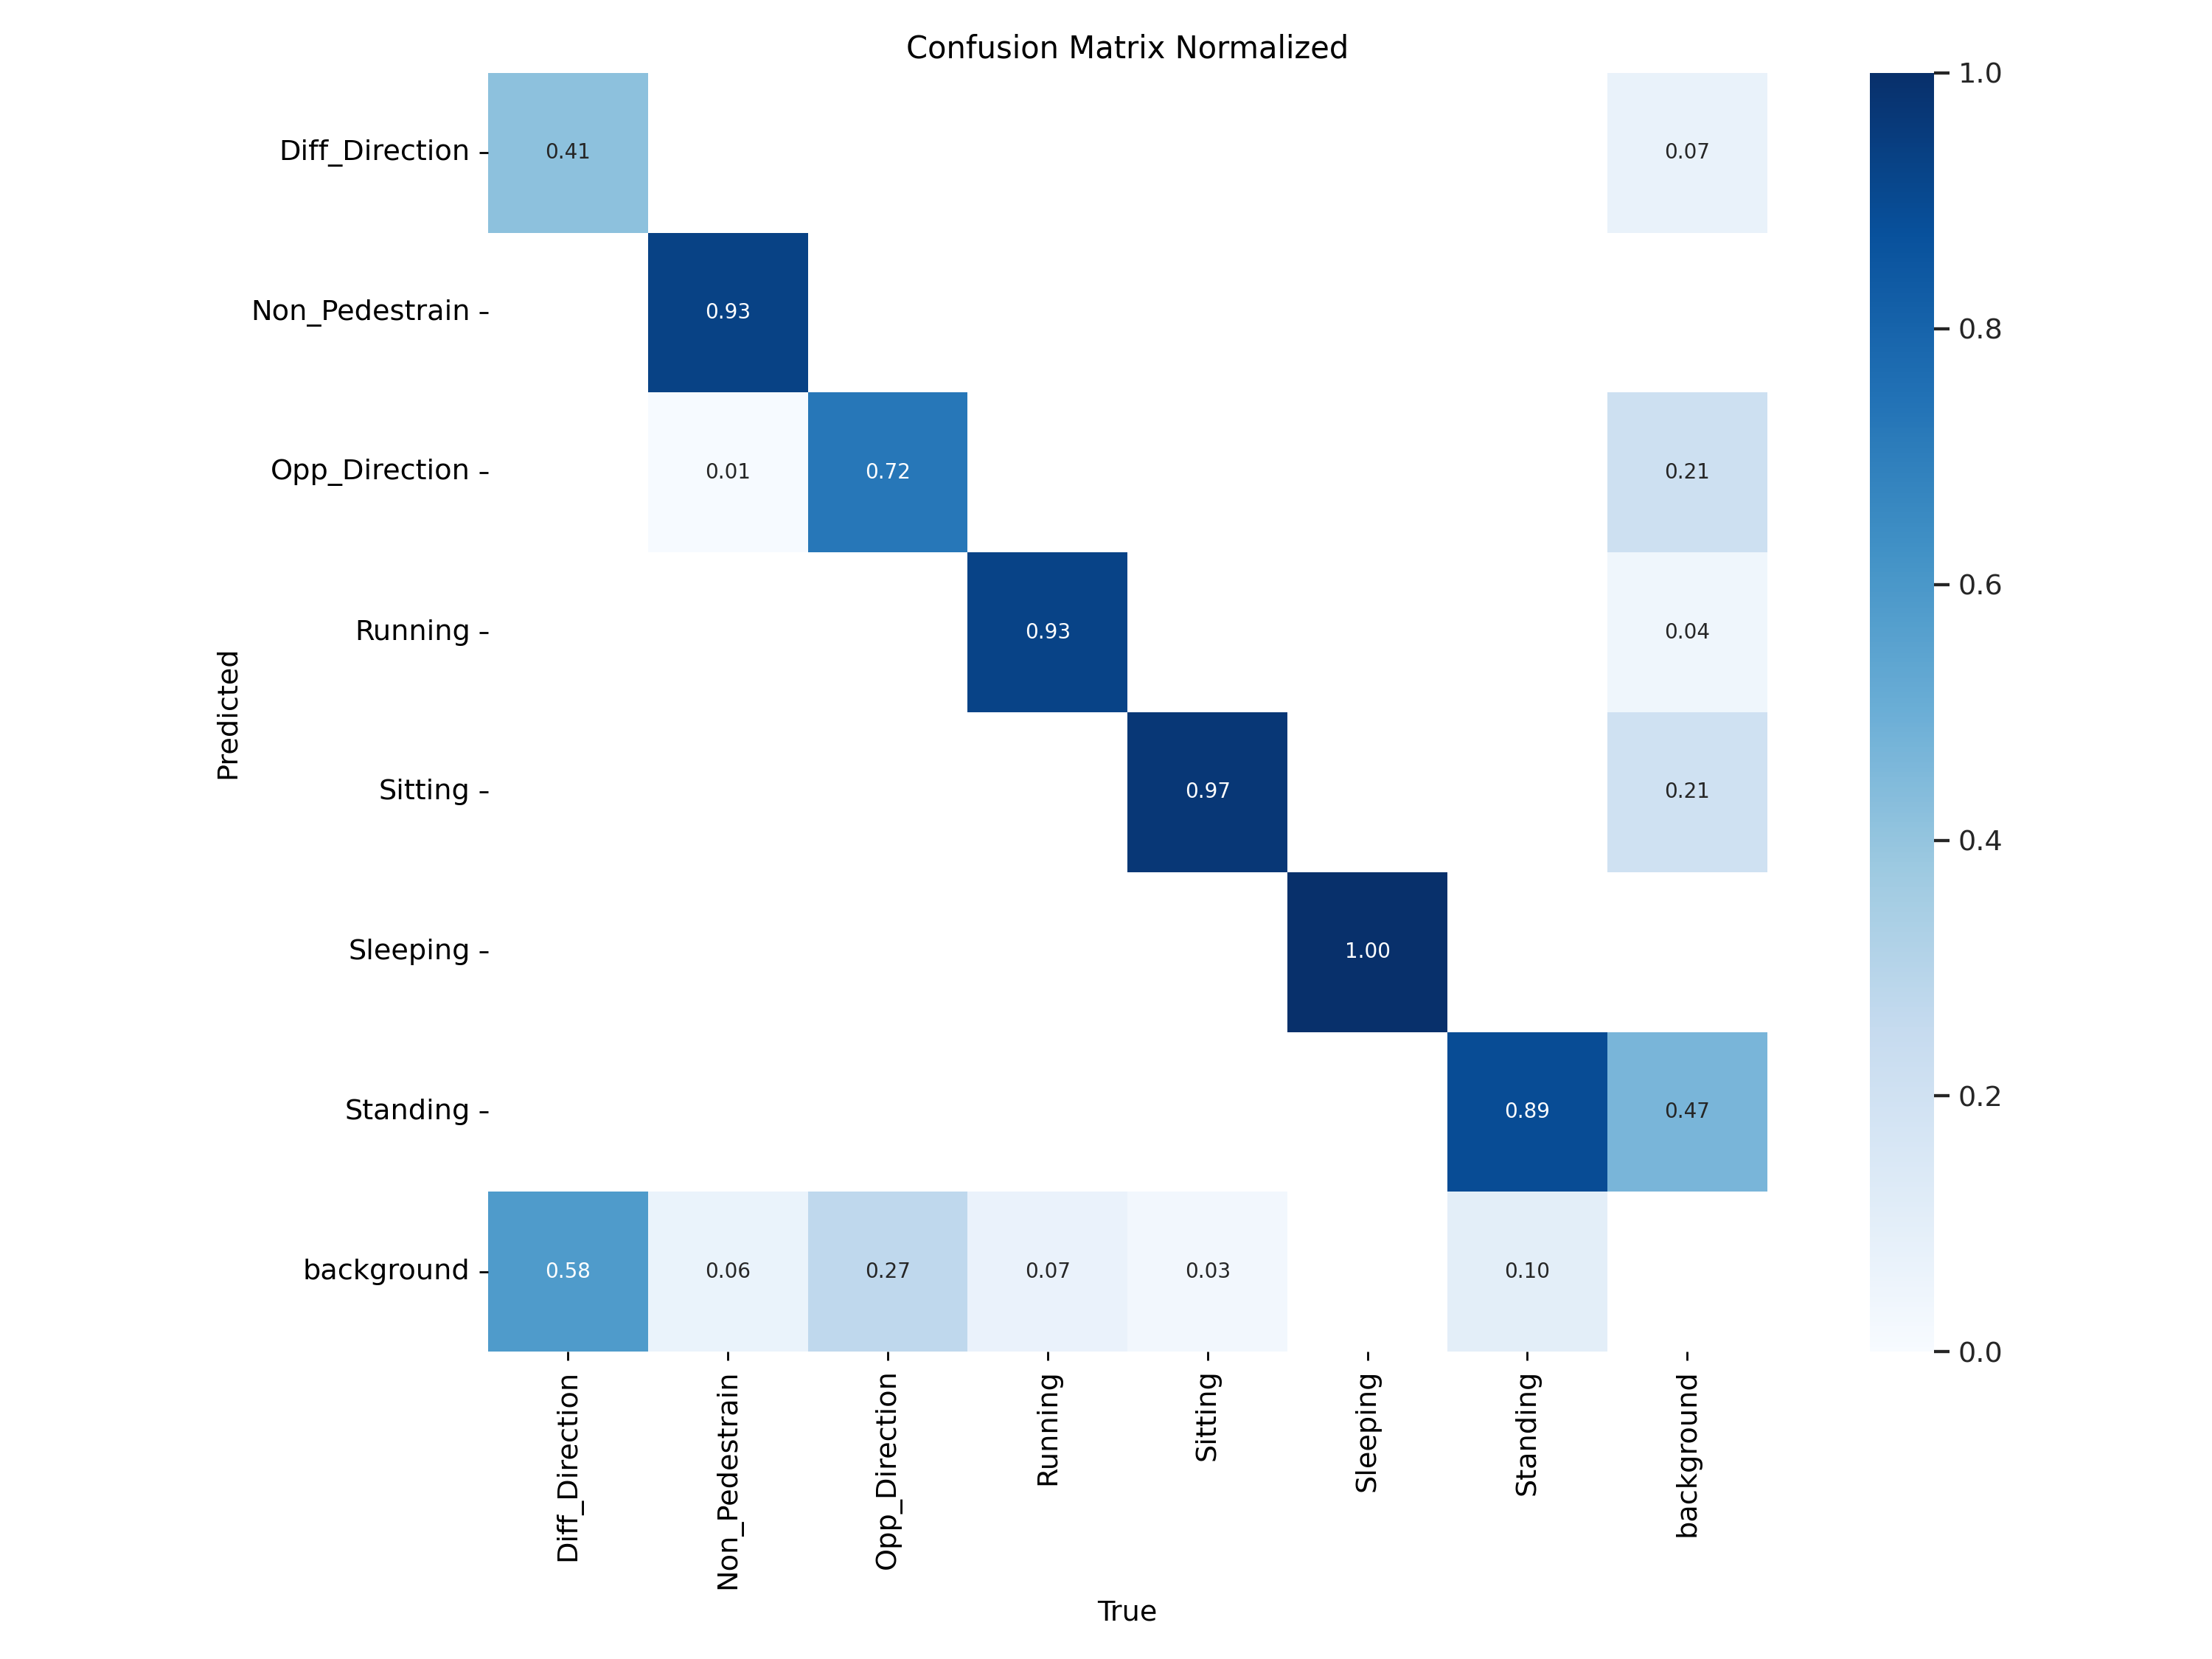

In [13]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=600)


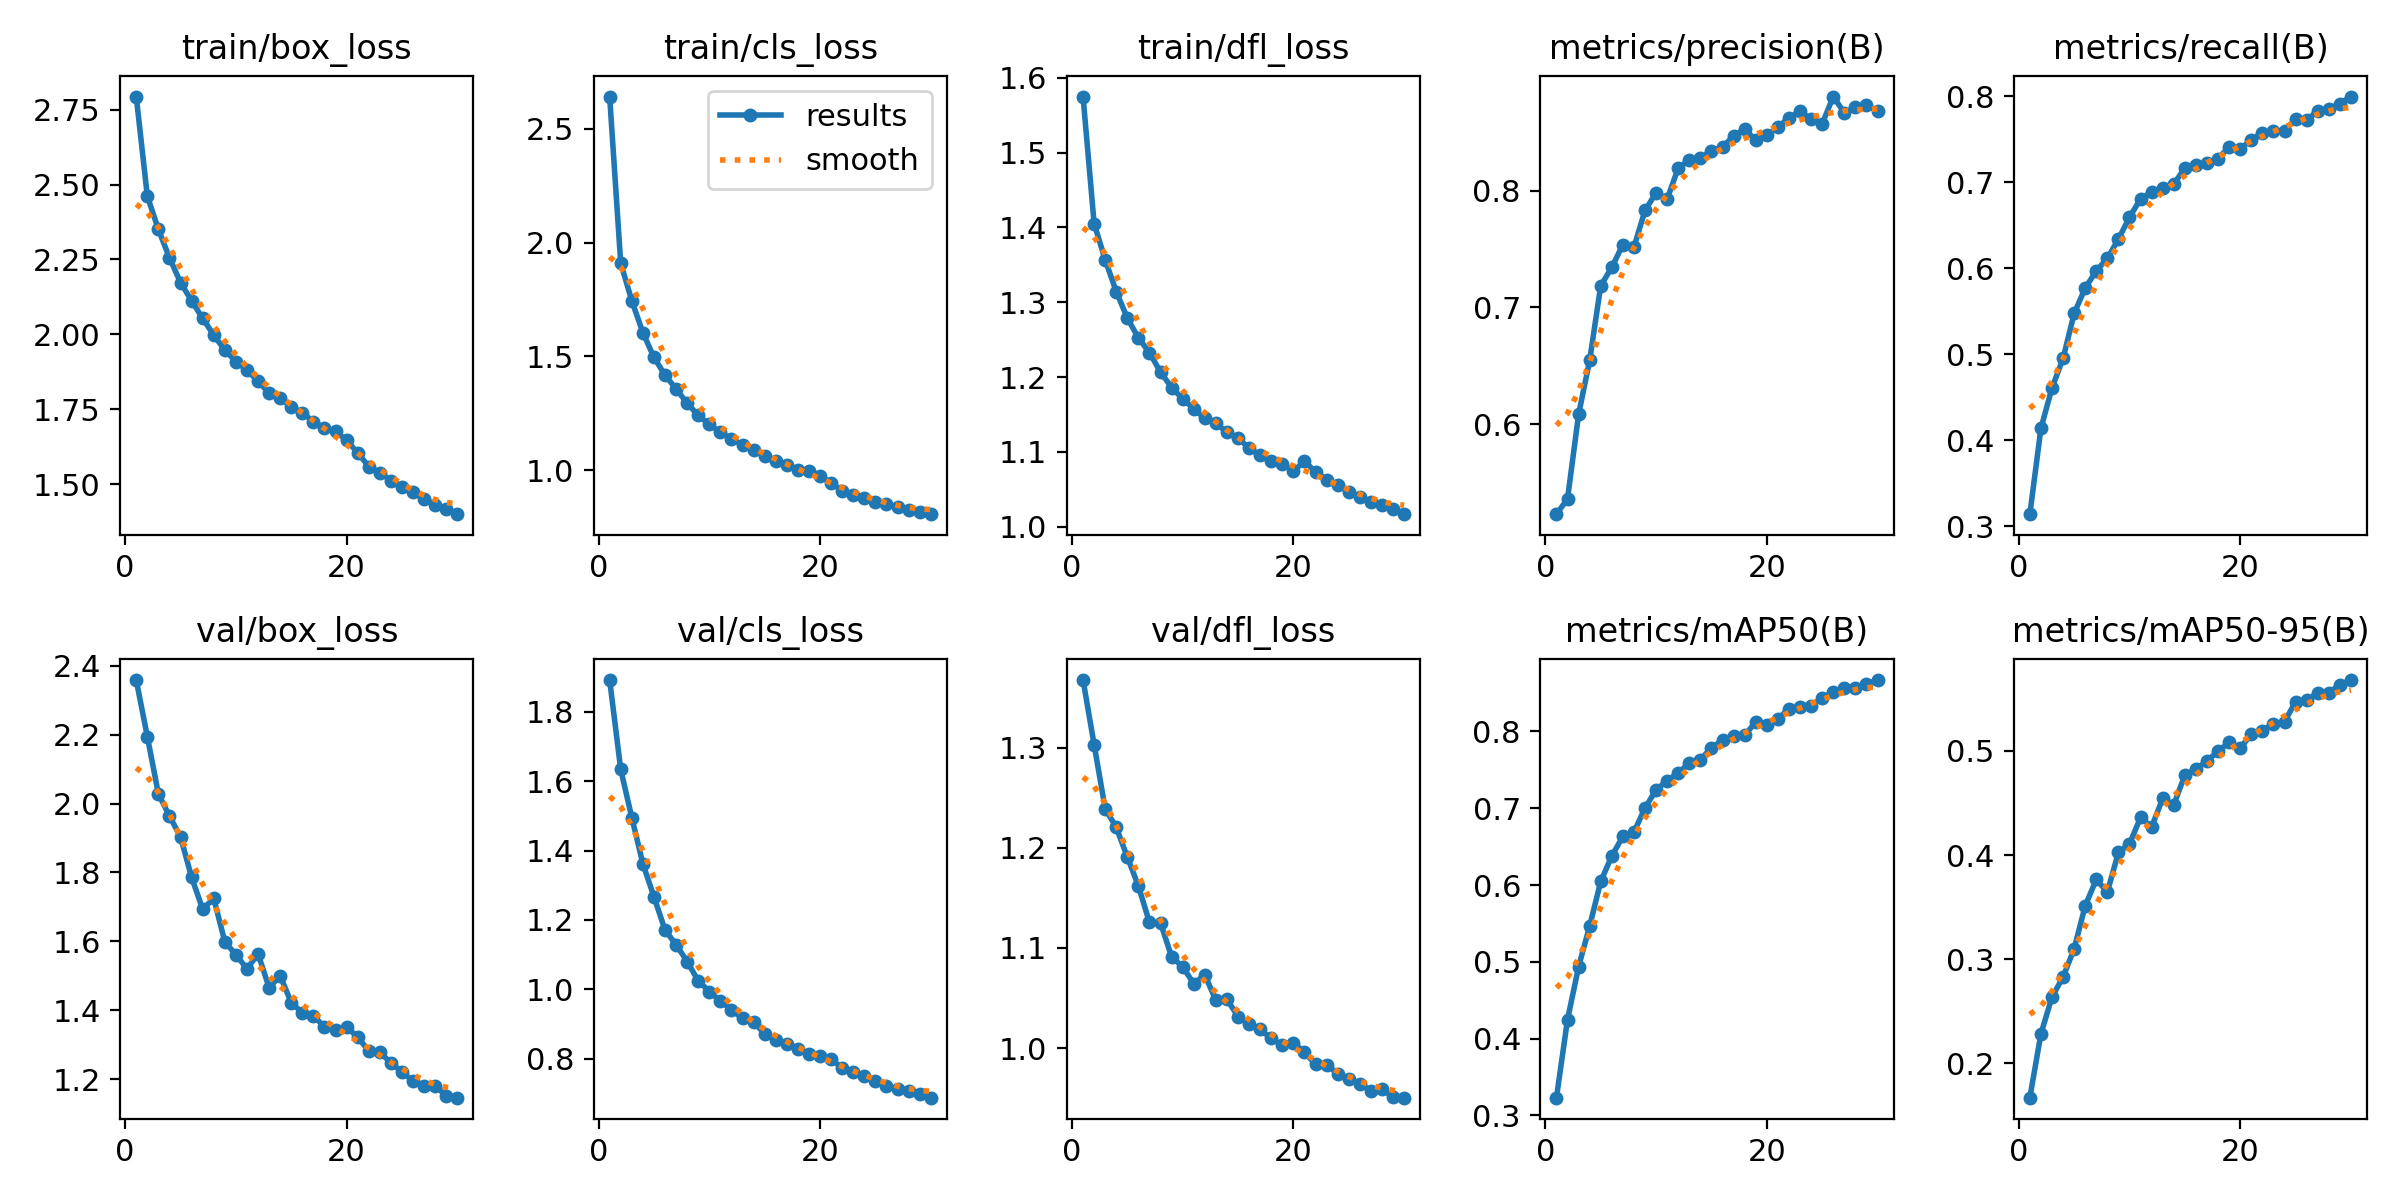

In [14]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

validate

In [11]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Abnormal_Behavior_in_Hajj_Crowd_v2i_yolov8/data.yaml


Ultralytics YOLOv8.0.190 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/Abnormal_Behavior_in_Hajj_Crowd_v2i_yolov8/valid/labels.cache... 757 images, 0 backgrounds, 0 corrupt: 100% 757/757 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 48/48 [00:40<00:00,  1.18it/s]
                   all        757      22845       0.87        0.8      0.867      0.573
        Diff_Direction        757       1992      0.775      0.336      0.543      0.244
        Non_Pedestrain        757        157      0.938      0.917      0.969      0.574
         Opp_Direction        757       3179      0.785      0.645      0.765      0.376
               Running        757        890      0.835      0.887      0.898      0.467
               Sitting        757       7347      0.914      0.958       0.98      0.752
 

test

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25  source=/content/drive/MyDrive/Abnormal_Behavior_in_Hajj_Crowd_v2i_yolov8/test/images



Ultralytics YOLOv8.0.190 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

image 1/378 /content/drive/MyDrive/Abnormal_Behavior_in_Hajj_Crowd_v2i_yolov8/test/images/TR_10_mp4-119_jpg.rf.a0b19291e30da6f7562fe272e631eeb2.jpg: 640x640 3 Diff_Directions, 9 Opp_Directions, 5 Runnings, 10 Sittings, 5 Standings, 16.3ms
image 2/378 /content/drive/MyDrive/Abnormal_Behavior_in_Hajj_Crowd_v2i_yolov8/test/images/TR_10_mp4-133_jpg.rf.b6fec2d1b0f779807cd1f164a019d936.jpg: 640x640 4 Diff_Directions, 4 Opp_Directions, 6 Runnings, 10 Sittings, 5 Standings, 16.4ms
image 3/378 /content/drive/MyDrive/Abnormal_Behavior_in_Hajj_Crowd_v2i_yolov8/test/images/TR_10_mp4-135_jpg.rf.6ea4fa8bbec78f274568d78d2aa6d3a1.jpg: 640x640 4 Diff_Directions, 5 Opp_Directions, 4 Runnings, 10 Sittings, 5 Standings, 16.4ms
image 4/378 /content/drive/MyDrive/Abnormal_Behavior_in_Hajj_Crowd_v2i_yolov8/test/images/TR_10_mp4-136_jpg.rf.19

display some images

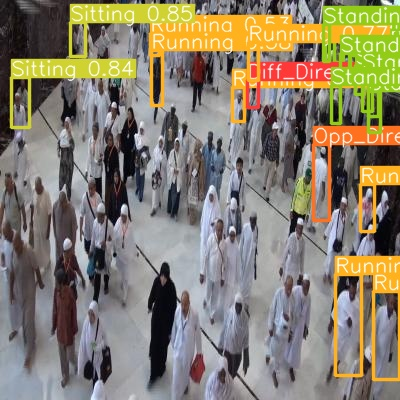

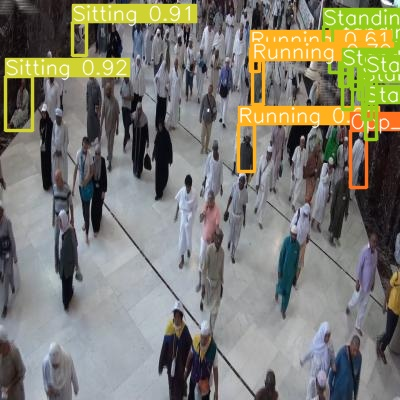

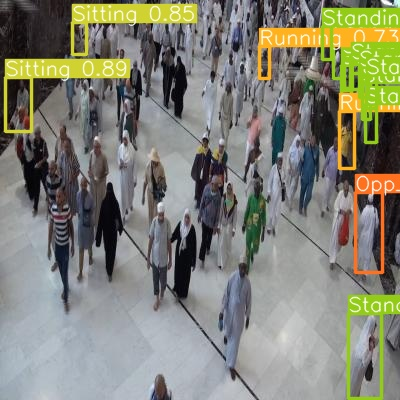

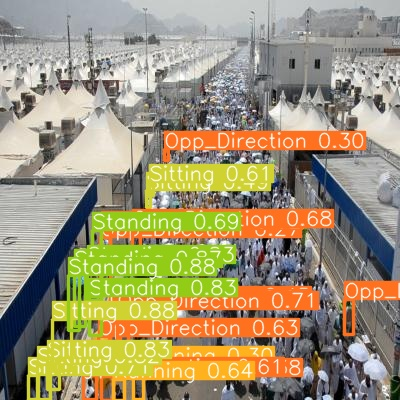

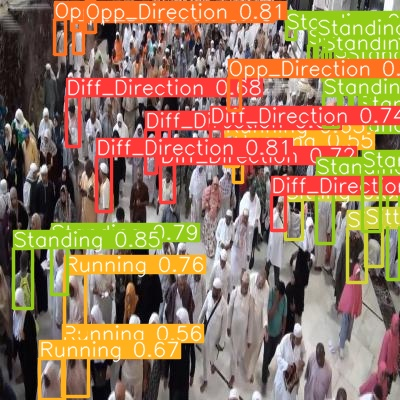

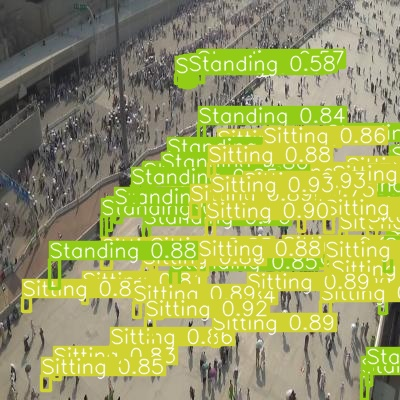

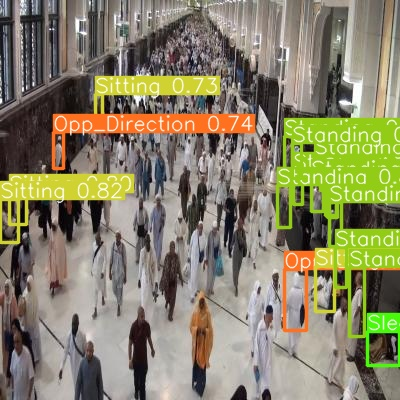

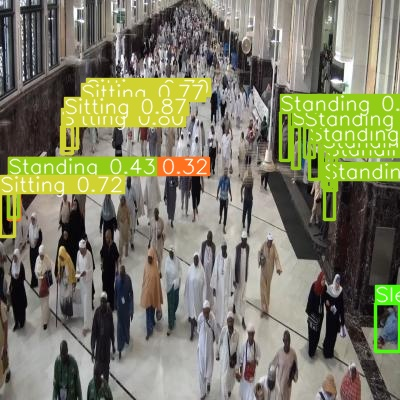

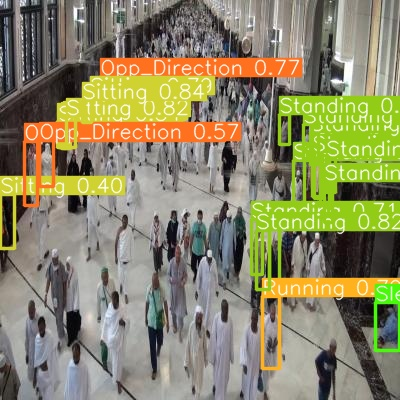

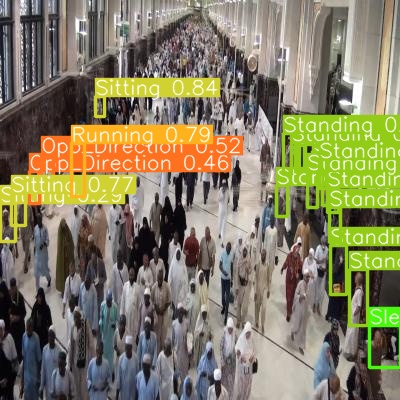

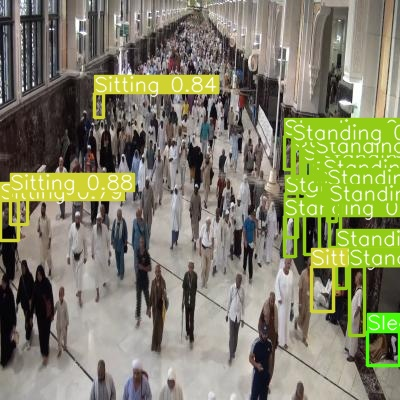

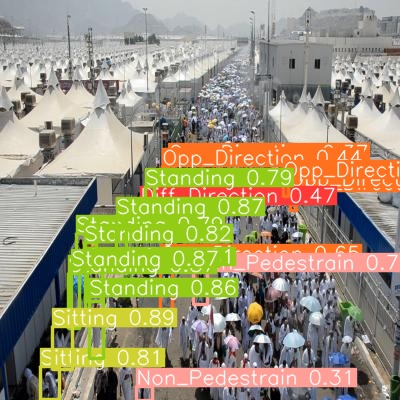

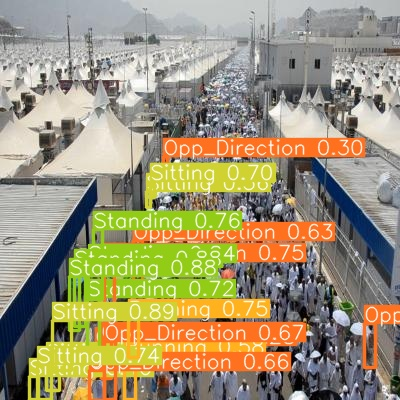

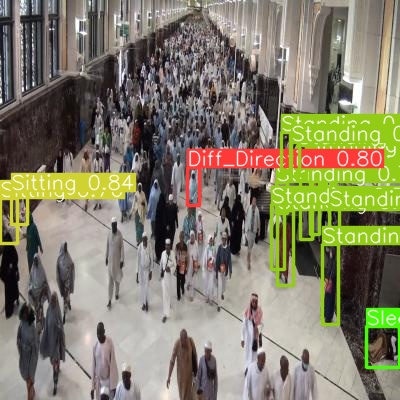

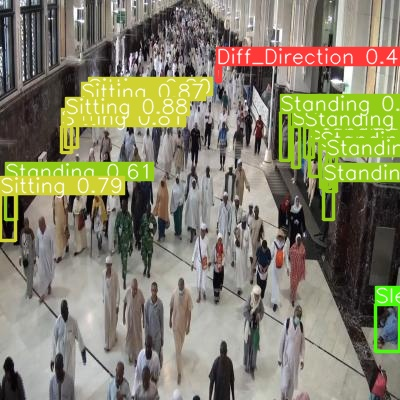

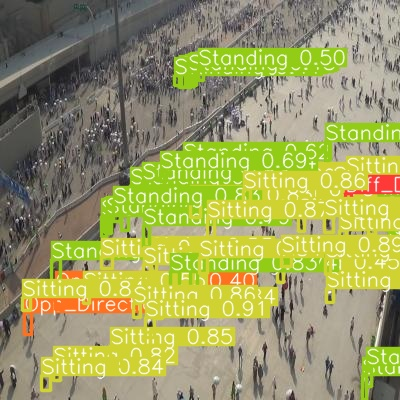

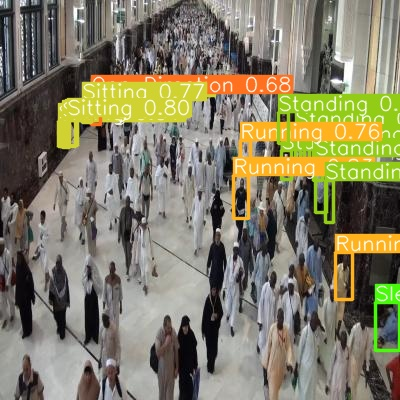

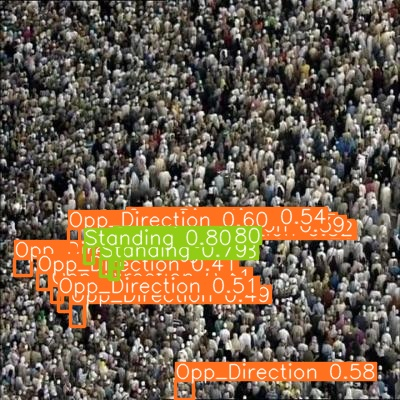

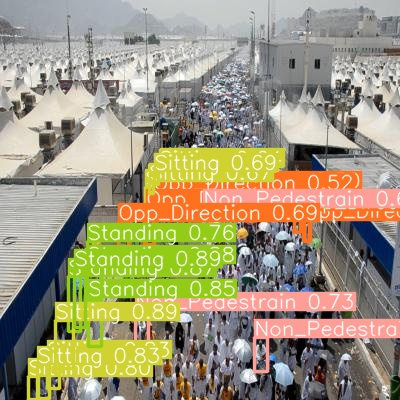

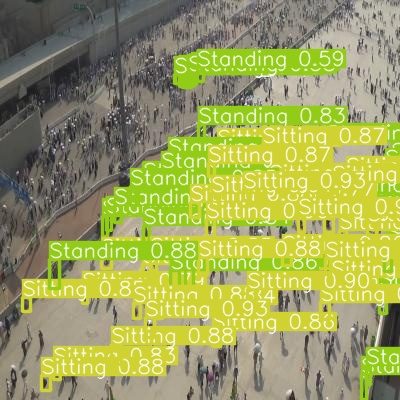

In [15]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")